In [156]:
import pandas as pd
from IPython.display import HTML
import plotly.express as px

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

from xgboost import XGBClassifier
# Initialize and evaluate GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

import time

import scipy.stats as ss

In [147]:
# Load the dataset
file_path = './Data/MergedData.csv'
merged_df = pd.read_csv(file_path)

/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/4016632151.py:3: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



In [88]:
df = merged_df

# View the first few rows
print(df.head(10))

   order_date  order_number material_number  order_material_net_value  \
0  2024-03-22    3029222083       034.053V4                     77.00   
1  2024-01-02    3028167231         109.945                    496.35   
2  2024-04-01    3029321383        066.1304                     79.94   
3  2024-03-15    3029122662        061.4512                    196.00   
4  2024-04-19    3029564602        066.1304                    605.71   
5  2024-04-08    3029402732         109.945                    249.52   
6  2024-01-23    3028422081        026.0009                    220.00   
7  2024-01-16    3028327104    Y1001949-STM                   2903.50   
8  2024-04-16    3029514268         041.777                     41.47   
9  2024-02-23    3028843696    Y1001949-STM                   2882.50   

  sales_channel               PRH1                             PRH4  \
0     non-eShop  Implant Solutions      Instruments, Cases + Others   
1     non-eShop  Implant Solutions       BLAT Ti Impla

In [89]:
# Summary statistics
print(df.describe())


       order_number  order_material_net_value
count  3.167194e+06              3.167194e+06
mean   1.994159e+09              4.188962e+02
std    1.392496e+09              9.907860e+02
min    1.117802e+08             -1.251000e+01
25%    1.133769e+08              7.389000e+01
50%    3.022276e+09              1.924400e+02
75%    3.025996e+09              4.420000e+02
max    3.029658e+09              2.102800e+05


In [90]:
# Data types and missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3167194 entries, 0 to 3167193
Data columns (total 11 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   order_date                object 
 1   order_number              int64  
 2   material_number           object 
 3   order_material_net_value  float64
 4   sales_channel             object 
 5   PRH1                      object 
 6   PRH4                      object 
 7   customer_group            object 
 8   customer_number           object 
 9   region                    object 
 10  DSO_Ind                   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 265.8+ MB
None


In [91]:
# Missing values
print(df.isnull().sum())


order_date                        0
order_number                      0
material_number                   0
order_material_net_value          0
sales_channel                     0
PRH1                              0
PRH4                            219
customer_group                21563
customer_number                   0
region                      1504522
DSO_Ind                           0
dtype: int64


In [92]:
df['customer_group'] = merged_df['customer_group'].fillna('Unknown')
df['region'] = merged_df['region'].fillna('Unknown')
df['PRH4'] = merged_df['PRH4'].fillna('Unknown')

In [93]:
# Duplicates
print(df.duplicated().sum())


0


In [94]:
# Convert order_date to datetime
df['order_date'] = pd.to_datetime(df['order_date'])


In [95]:

# Total orders
total_orders = df.shape[0]

# Total number of unique customers
total_unique_customers = df['customer_number'].nunique()

# Total number of unique customer orders
total_unique_customer_orders = df['order_number'].nunique()

# Orders per customer
orders_per_customer = df.groupby('customer_number').size()

# Maximum number of orders per customer
max_orders_per_customer = orders_per_customer.max()

# Minimum number of orders per customer
min_orders_per_customer = orders_per_customer.min()

# Average number of orders per customer
avg_orders_per_customer = orders_per_customer.mean()

# Median number of orders per customer
median_orders_per_customer = orders_per_customer.median()

# Create HTML code for text indicators
html_code = f"""
<!DOCTYPE html>
<html>
<head>
<style>
/* Style the container */
.container {{
  display: flex;
  justify-content: center;
  flex-wrap: wrap;
}}

/* Style the indicators */
.indicator {{
  padding: 10px 20px;
  margin: 10px;
  font-size: 24px;
  border-radius: 10px;
  color: white;
}}

/* Define colors for each indicator */
.mean {{ background-color: #4CAF50; }}
.median {{ background-color: #FF9800; }}
.maximum {{ background-color: #f44336; }}
.minimum {{ background-color: #2196F3; }}
.total-orders {{ background-color: #673AB7; }}
.unique-customers {{ background-color: #009688; }}
.unique-orders {{ background-color: #E91E63; }}
</style>
</head>
<body>

<div class="container">
  <div class="indicator mean">Mean: {avg_orders_per_customer:.2f}</div>
  <div class="indicator median">Median: {median_orders_per_customer}</div>
  <div class="indicator maximum">Maximum: {max_orders_per_customer}</div>
  <div class="indicator minimum">Minimum: {min_orders_per_customer}</div>
  <div class="indicator total-orders">Total Orders: {total_orders}</div>
  <div class="indicator unique-customers">Total Unique Customers: {total_unique_customers}</div>
  <div class="indicator unique-orders">Total Unique Customer Orders: {total_unique_customer_orders}</div>
</div>

</body>
</html>
"""

# Display the text indicators with colors
display(HTML(html_code))

/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/1787732743.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




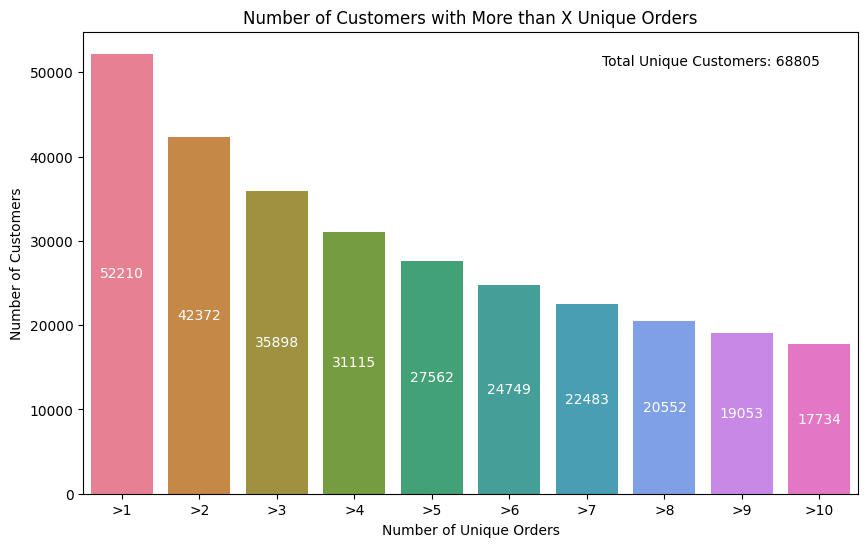

In [96]:

# Count unique orders per customer
unique_orders_per_customer = df.groupby('customer_number')['order_number'].nunique()

# Define the thresholds excluding the "Once" bucket
thresholds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Define labels
labels = [f'>{threshold}' for threshold in thresholds]

# Count the number of customers with more than each threshold
counts = [(unique_orders_per_customer > threshold).sum() for threshold in thresholds]

# Create a custom color palette
custom_palette = sns.color_palette("husl", len(thresholds))

# Create a bar plot
plt.figure(figsize=(10, 6))
bars = sns.barplot(x=labels, y=counts, palette=custom_palette)
plt.xlabel('Number of Unique Orders')
plt.ylabel('Number of Customers')
plt.title('Number of Customers with More than X Unique Orders')

# Add numbers inside the bars
for bar, count in zip(bars.patches, counts):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height / 2, count, ha='center', va='center', fontsize=10, color='white')

# Calculate and print total number of unique customers inside the chart
total_unique_customers = unique_orders_per_customer.count()
plt.text(0.95, 0.95, f'Total Unique Customers: {total_unique_customers}', transform=plt.gca().transAxes,
         horizontalalignment='right', verticalalignment='top', fontsize=10)

plt.show()


In [102]:

# Load the CSV file into a DataFrame (assuming your CSV is in the Data folder)
file_path = './Data/MergedData.csv'
df = pd.read_csv(file_path)

# Group by region and count unique orders
region_order_counts = df.groupby('region')['order_number'].nunique().reset_index()
region_order_counts.columns = ['Region', 'Unique Order Count']

# Create the bar chart with Plotly
fig = px.bar(
    region_order_counts,
    x='Region',
    y='Unique Order Count',
    text='Unique Order Count',
    hover_data={'Region': True, 'Unique Order Count': True},
    color='Unique Order Count',
    color_continuous_scale='Viridis',
    title='Region-wise Unique Order Count'
)

# Update layout to show text on bars
fig.update_traces(texttemplate='%{text}', textposition='outside')

# Show the chart
fig.show()

/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/4115467501.py:3: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



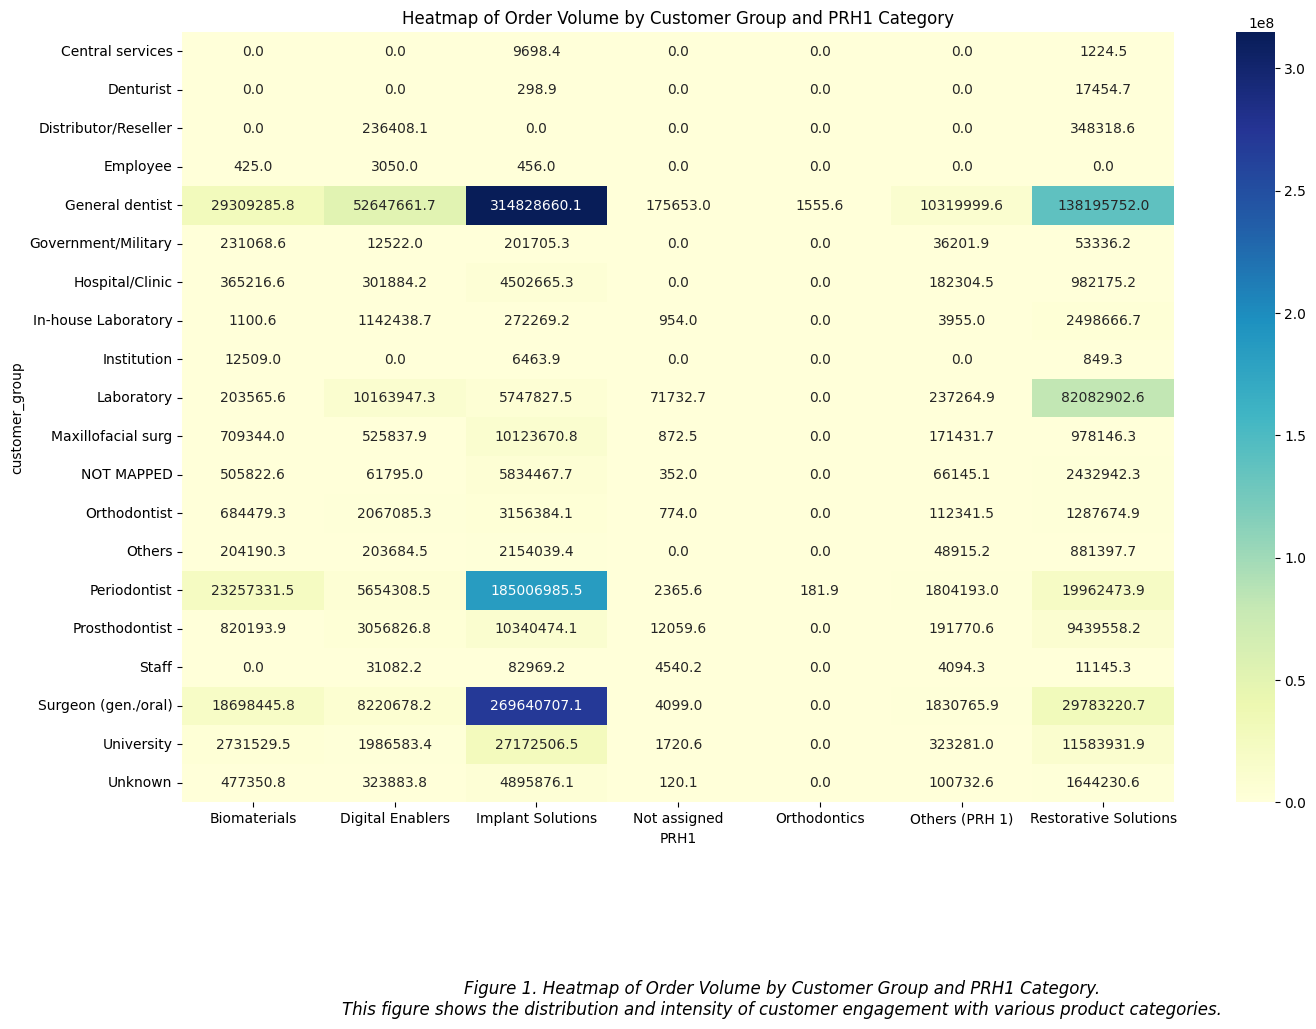

In [98]:
order_volume = df.pivot_table(index='customer_group', columns='PRH1', values='order_material_net_value', aggfunc='sum', fill_value=0)
plt.figure(figsize=(16, 10))
sns.heatmap(order_volume, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Heatmap of Order Volume by Customer Group and PRH1 Category')

# Add APA style figure label
plt.figtext(0.5, -0.1, 'Figure 1. Heatmap of Order Volume by Customer Group and PRH1 Category.\nThis figure shows the distribution and intensity of customer engagement with various product categories.', wrap=True, horizontalalignment='center', fontsize=12, style='italic')


# Save the plot as an image file
plt.savefig('Heatmap_of_Order_Vol_by_Customer_Group_and_PRH1.png', bbox_inches='tight')

plt.show()



In [99]:
# Group by sales_channel and PRH1 and count unique orders
sunburst_data = df.groupby(['sales_channel', 'PRH1'])['order_number'].nunique().reset_index()
sunburst_data.columns = ['Sales Channel', 'PRH1', 'Unique Orders']

# Create the Sunburst chart
fig = px.sunburst(
    sunburst_data,
    path=['Sales Channel', 'PRH1'],
    values='Unique Orders',
    color='Unique Orders',
    color_continuous_scale='Viridis',
    title='Sunburst Chart of Unique Orders by Sales Channel and PRH1'
)

# Show the chart
fig.show()


In [100]:

# Group by sales_channel and PRH1 and count unique orders
treemap_data = df.groupby(['sales_channel', 'PRH1'])['order_number'].nunique().reset_index()
treemap_data.columns = ['Sales Channel', 'PRH1', 'Unique Orders']

# Create the Treemap chart
fig = px.treemap(
    treemap_data,
    path=['Sales Channel', 'PRH1'],
    values='Unique Orders',
    color='Unique Orders',
    color_continuous_scale='RdYlBu',
    title='Treemap of Unique Orders by Sales Channel and PRH1'
)

# Show the chart
fig.show()


In [85]:

# Group by PRH1 and PRH4 and count unique orders
treemap_data = df.groupby(['PRH1', 'PRH4'])['order_number'].nunique().reset_index()
treemap_data.columns = ['PRH1', 'PRH4', 'Unique Orders']

# Create the Treemap chart
fig = px.treemap(
    treemap_data,
    path=['PRH1', 'PRH4'],
    values='Unique Orders',
    color='Unique Orders',
    color_continuous_scale='RdYlBu',
    title='Treemap of Unique Orders by PRH1 and PRH4'
)

# Show the chart
fig.show()


/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/824686615.py:7: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



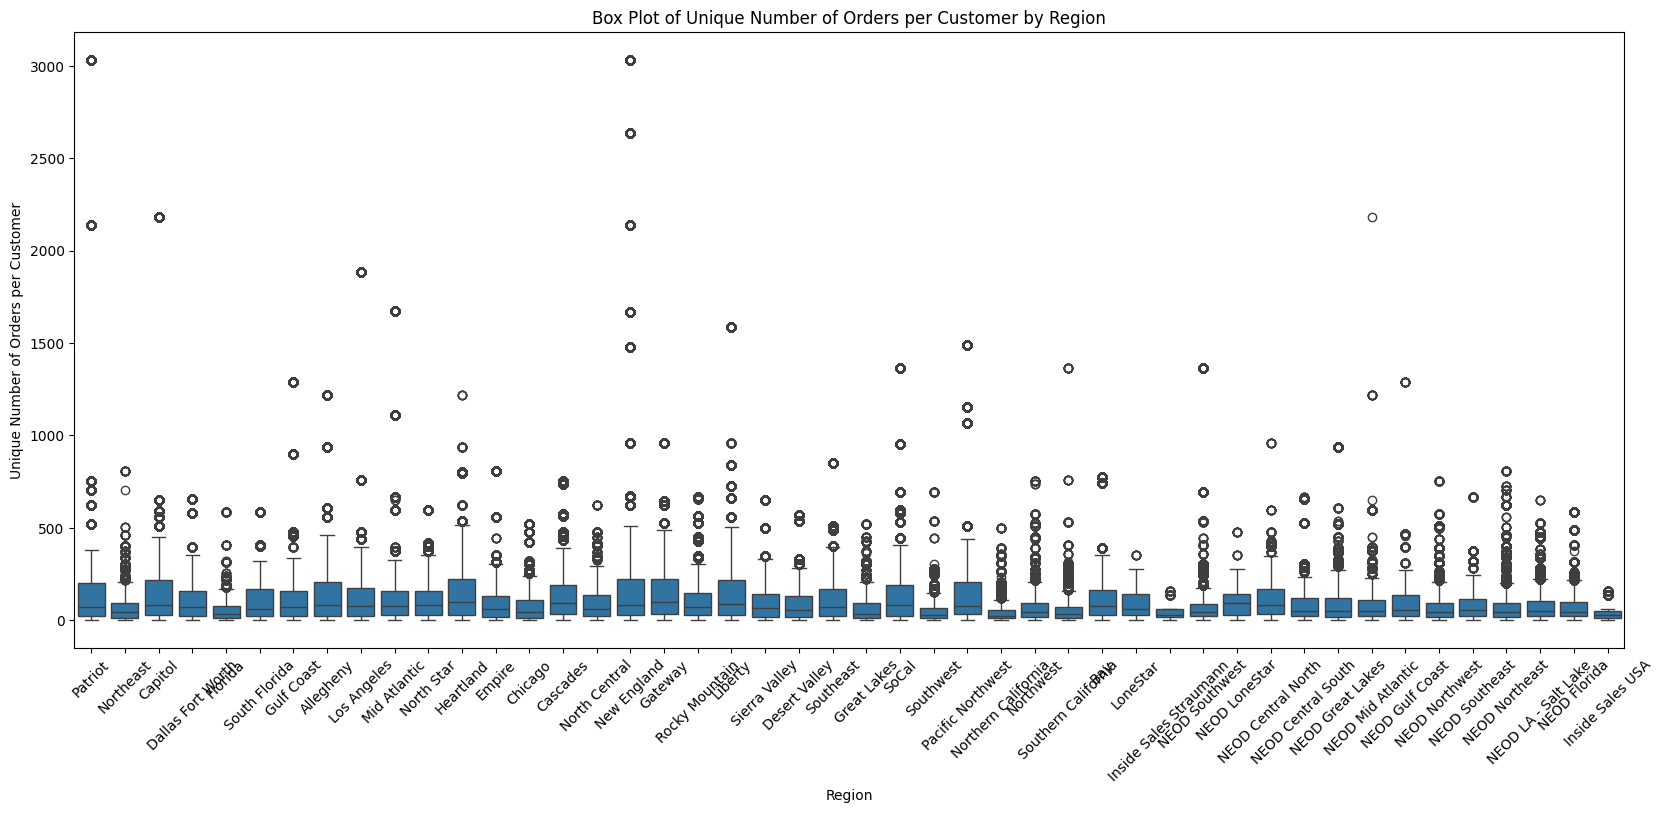

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame (assuming your CSV is in the Data folder)
file_path = './Data/MergedData.csv'
df = pd.read_csv(file_path)

# Count the number of unique orders per customer
customer_orders = df.groupby('customer_number')['order_number'].nunique().reset_index()
customer_orders.columns = ['customer_number', 'unique_orders']

# Merge the unique orders count with the original DataFrame to get the region
df_merged = pd.merge(df, customer_orders, on='customer_number', how='left')

# Create a box plot for unique number of orders per customer grouped by region
plt.figure(figsize=(20, 8))
sns.boxplot(x='region', y='unique_orders', data=df_merged)
plt.title('Box Plot of Unique Number of Orders per Customer by Region')
plt.xlabel('Region')
plt.ylabel('Unique Number of Orders per Customer')
plt.xticks(rotation=45)
plt.show()


In [107]:
# Load the CSV file into a DataFrame (assuming your CSV is in the Data folder)
file_path = './Data/MergedData.csv'
df = pd.read_csv(file_path)

# Identify rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]

# Group by customer number and count unique customers with at least one null value
customers_with_nulls = rows_with_nulls['customer_number'].nunique()

print(f"Number of customers with at least one null value: {customers_with_nulls}")


/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/2177174371.py:5: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



Number of customers with at least one null value: 51105


In [109]:
import pandas as pd

# Load the CSV file into a DataFrame (assuming your CSV is in the Data folder)
file_path = './Data/MergedData.csv'
df = pd.read_csv(file_path)

# Identify rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]

# Group by customer number and count unique customers with at least one null value
customers_with_nulls = rows_with_nulls['customer_number'].nunique()

# Total unique customers
total_unique_customers = df['customer_number'].nunique()



# Group by customer number and count unique customers with no null values
customers_without_nulls = total_unique_customers - customers_with_nulls

print(f"Total unique customers: {total_unique_customers}")
print(f"Number of customers with at least one null value: {customers_with_nulls}")
print(f"Total unique customers with no null values: {customers_without_nulls}")


/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/2471084466.py:5: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



Total unique customers: 68805
Number of customers with at least one null value: 51105
Total unique customers with no null values: 17700


In [128]:
import pandas as pd

# Load the dataset
file_path = '/Users/sachin/Documents/MPS/Courses/ALY6980/Client Data/MergedCSV/MergedData.csv'
merged_df = pd.read_csv(file_path)

# Identify customers with any NULL values in any column
customers_with_nulls = merged_df[merged_df.isnull().any(axis=1)]['customer_number'].unique()

# Remove all records of these customers from the dataset
cleaned_df = merged_df[~merged_df['customer_number'].isin(customers_with_nulls)]

# Calculate the unique order count for each customer
unique_orders_per_customer = cleaned_df.groupby('customer_number')['order_number'].nunique()

# Identify customers who have placed more than 3 unique orders
customers_with_more_than_3_orders = unique_orders_per_customer[unique_orders_per_customer > 2].index

# Filter the cleaned_df to keep only those customers
filtered_cleaned_df = cleaned_df[cleaned_df['customer_number'].isin(customers_with_more_than_3_orders)]

# Calculate the number of unique PRH4 per order
unique_prh4_per_order = filtered_cleaned_df.groupby(['order_number', 'customer_number'])['PRH4'].nunique()

# Create dictionaries to hold the counts for customers and orders
prh4_customer_counts = {
    "exactly_1": 0,
    "more_than_equal_2": 0,
    "more_than_equal_3": 0,
    "more_than_equal_4": 0,
    "more_than_equal_5": 0,
    "more_than_equal_6": 0,
    "more_than_equal_7": 0,
    "more_than_equal_8": 0,
    "more_than_equal_9": 0,
    "more_than_equal_10": 0
}

prh4_order_counts = {
    "exactly_1": 0,
    "more_than_equal_2": 0,
    "more_than_equal_3": 0,
    "more_than_equal_4": 0,
    "more_than_equal_5": 0,
    "more_than_equal_6": 0,
    "more_than_equal_7": 0,
    "more_than_equal_8": 0,
    "more_than_equal_9": 0,
    "more_than_equal_10": 0
}

# Count customers based on the unique PRH4 per order
for customer, prh4_count in unique_prh4_per_order.groupby(level=1).max().items():
    if prh4_count == 1:
        prh4_customer_counts["exactly_1"] += 1
    if prh4_count >= 2:
        prh4_customer_counts["more_than_equal_2"] += 1
    if prh4_count >= 3:
        prh4_customer_counts["more_than_equal_3"] += 1
    if prh4_count >= 4:
        prh4_customer_counts["more_than_equal_4"] += 1
    if prh4_count >= 5:
        prh4_customer_counts["more_than_equal_5"] += 1
    if prh4_count >= 6:
        prh4_customer_counts["more_than_equal_6"] += 1
    if prh4_count >= 7:
        prh4_customer_counts["more_than_equal_7"] += 1
    if prh4_count >= 8:
        prh4_customer_counts["more_than_equal_8"] += 1
    if prh4_count >= 9:
        prh4_customer_counts["more_than_equal_9"] += 1
    if prh4_count >= 10:
        prh4_customer_counts["more_than_equal_10"] += 1

# Count orders based on the unique PRH4 per order
for order, prh4_count in unique_prh4_per_order.items():
    if prh4_count == 1:
        prh4_order_counts["exactly_1"] += 1
    if prh4_count >= 2:
        prh4_order_counts["more_than_equal_2"] += 1
    if prh4_count >= 3:
        prh4_order_counts["more_than_equal_3"] += 1
    if prh4_count >= 4:
        prh4_order_counts["more_than_equal_4"] += 1
    if prh4_count >= 5:
        prh4_order_counts["more_than_equal_5"] += 1
    if prh4_count >= 6:
        prh4_order_counts["more_than_equal_6"] += 1
    if prh4_count >= 7:
        prh4_order_counts["more_than_equal_7"] += 1
    if prh4_count >= 8:
        prh4_order_counts["more_than_equal_8"] += 1
    if prh4_count >= 9:
        prh4_order_counts["more_than_equal_9"] += 1
    if prh4_count >= 10:
        prh4_order_counts["more_than_equal_10"] += 1

# Display the results
print("Customer Counts:")
for key, value in prh4_customer_counts.items():
    print(f'Customers who ordered {key.replace("_", " ")} PRH4 in a single order: {value}')

print("\nOrder Counts:")
for key, value in prh4_order_counts.items():
    print(f'Orders with {key.replace("_", " ")} PRH4 in a single order: {value}')


/var/folders/hl/w5x9js51325d0gtv9ldxkd8c0000gn/T/ipykernel_22059/352712001.py:5: DtypeWarning:

Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.



Customer Counts:
Customers who ordered exactly 1 PRH4 in a single order: 2289
Customers who ordered more than equal 2 PRH4 in a single order: 2749
Customers who ordered more than equal 3 PRH4 in a single order: 1104
Customers who ordered more than equal 4 PRH4 in a single order: 509
Customers who ordered more than equal 5 PRH4 in a single order: 215
Customers who ordered more than equal 6 PRH4 in a single order: 85
Customers who ordered more than equal 7 PRH4 in a single order: 35
Customers who ordered more than equal 8 PRH4 in a single order: 12
Customers who ordered more than equal 9 PRH4 in a single order: 4
Customers who ordered more than equal 10 PRH4 in a single order: 1

Order Counts:
Orders with exactly 1 PRH4 in a single order: 22978
Orders with more than equal 2 PRH4 in a single order: 8357
Orders with more than equal 3 PRH4 in a single order: 2493
Orders with more than equal 4 PRH4 in a single order: 897
Orders with more than equal 5 PRH4 in a single order: 326
Orders with m

In [110]:
merged_df = df

# Identify customers with any NULL values in any column
customers_with_nulls = merged_df[merged_df.isnull().any(axis=1)]['customer_number'].unique()

# Remove all records of these customers from the dataset
cleaned_df = merged_df[~merged_df['customer_number'].isin(customers_with_nulls)]

# Calculate the unique order count for each customer
unique_orders_per_customer = cleaned_df.groupby('customer_number')['order_number'].nunique()

# Identify customers who have placed more than 3 unique orders
customers_with_more_than_3_orders = unique_orders_per_customer[unique_orders_per_customer > 2].index

# Filter the cleaned_df to keep only those customers
filtered_cleaned_df = cleaned_df[cleaned_df['customer_number'].isin(customers_with_more_than_3_orders)]

# Calculate the number of unique PRH4 per order
unique_prh4_per_order = filtered_cleaned_df.groupby(['order_number', 'customer_number'])['PRH4'].nunique()

# Identify customers who have ordered more than 7 unique PRH4 in the same order
customers_with_more_than_7_prh4 = unique_prh4_per_order[unique_prh4_per_order >= 7].index.get_level_values('customer_number').unique()

# Remove all records of these customers from the filtered_cleaned_df
final_cleaned_df = filtered_cleaned_df[~filtered_cleaned_df['customer_number'].isin(customers_with_more_than_7_prh4)]

# Display the number of records in the final cleaned dataset
num_records_final_cleaned = final_cleaned_df.shape[0]
print(f'The number of records in the final_cleaned_df DataFrame: {num_records_final_cleaned}')

# Check the number of unique customers in the final cleaned dataframe
unique_customers_final_cleaned = final_cleaned_df['customer_number'].nunique()
print(f'The number of unique customers in the final_cleaned_df DataFrame: {unique_customers_final_cleaned}')

# Assuming df is your final DataFrame
final_cleaned_df.to_csv('./Data/final_preprocessed_data.csv', index=False)

The number of records in the final_cleaned_df DataFrame: 94995
The number of unique customers in the final_cleaned_df DataFrame: 5003


In [ ]:
# Load the dataset
preprocessed_file_path = './Data/MergedData.csv'
final_cleaned_df = pd.read_csv(preprocessed_file_path)

In [116]:
# Load the dataset
preprocessed_file_path = './Data/MergedData.csv'

df = pd.read_csv(preprocessed_file_path)

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)


# Total number of records
total_records = len(df)

# Calculate the split index
split_index = int(total_records * 0.8)


X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# Initialize the model
model = RandomForestClassifier(random_state=42)

In [125]:
# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [127]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred)

# Display the evaluation metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuracy: 0.502131691141639
Precision: 0.47654466658314026
Recall: 0.502131691141639
F1 Score: 0.4703046100633046
Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         5
             Abutments, Edentulous       0.36      0.18      0.24       432
                    Abutments, SRA       0.35      0.09      0.14       825
                Abutments, Ti Base       0.63      0.43      0.51       492
  Abutments, single tooth + bridge       0.54      0.24      0.33       207
        Allogenic Bone Substitutes       0.29      0.33      0.31       271
      Allogenic Soft Tissue Grafts       0.00      0.00      0.00        13
               BL Healing Surgical       0.39      0.20      0.27      2179
     BLAT Ti Implants, hydrophilic       0.57      0.77      0.66      1684
        BLAT Ti Implants, standard       0.63      0.64      0.64      1574
   BLAT TiZr Implants, hyd

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [135]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Assuming df is already loaded as your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Split the data into training and testing sets
total_records = len(df)
split_index = int(total_records * 0.8)
X_train = X[:split_index]
X_test = X[split_index:]
y_train = y[:split_index]
y_test = y[split_index:]

# Function to train and evaluate a model
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)
    
    # Display the evaluation metrics
    print(f'{model_name} - Evaluation Metrics:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print('Classification Report:')
    print(report)
    print('\n')



# Initialize and evaluate GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=42)
evaluate_model(gbm_model, "Gradient Boosting Machine")

# Initialize and evaluate RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, "Random Forest")

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this

Gradient Boosting Machine - Evaluation Metrics:
Accuracy: 0.4243381230591084
Precision: 0.43537674703174223
Recall: 0.4243381230591084
F1 Score: 0.368481221371007
Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         5
             Abutments, Edentulous       0.40      0.07      0.11       432
                    Abutments, SRA       0.26      0.03      0.05       825
                Abutments, Ti Base       0.60      0.26      0.36       492
  Abutments, single tooth + bridge       0.51      0.29      0.37       207
        Allogenic Bone Substitutes       0.50      0.18      0.27       271
      Allogenic Soft Tissue Grafts       0.00      0.00      0.00        13
               BL Healing Surgical       0.37      0.14      0.20      2179
     BLAT Ti Implants, hydrophilic       0.43      0.65      0.52      1684
        BLAT Ti Implants, standard       0.51      0.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Random Forest - Evaluation Metrics:
Accuracy: 0.502131691141639
Precision: 0.47654466658314026
Recall: 0.502131691141639
F1 Score: 0.4703046100633046
Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         5
             Abutments, Edentulous       0.36      0.18      0.24       432
                    Abutments, SRA       0.35      0.09      0.14       825
                Abutments, Ti Base       0.63      0.43      0.51       492
  Abutments, single tooth + bridge       0.54      0.24      0.33       207
        Allogenic Bone Substitutes       0.29      0.33      0.31       271
      Allogenic Soft Tissue Grafts       0.00      0.00      0.00        13
               BL Healing Surgical       0.39      0.20      0.27      2179
     BLAT Ti Implants, hydrophilic       0.57      0.77      0.66      1684
        BLAT Ti Implants, standard       0.63      0.64      0.64 

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [138]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train and evaluate the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Get the unique classes in the test set for the report
unique_labels = sorted(set(y_test))
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

report = classification_report(y_test, y_pred, target_names=target_names)

# Display the evaluation metrics
print('Random Forest - Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)


Random Forest - Evaluation Metrics:
Accuracy: 0.5551344807621453
Precision: 0.5376323191062479
Recall: 0.5551344807621453
F1 Score: 0.5363148218462832
Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         1
             Abutments, Edentulous       0.39      0.24      0.30       447
                    Abutments, SRA       0.35      0.16      0.22       882
                Abutments, Ti Base       0.60      0.41      0.49       401
  Abutments, single tooth + bridge       0.47      0.30      0.36       240
        Allogenic Bone Substitutes       0.49      0.36      0.42       293
      Allogenic Soft Tissue Grafts       0.33      0.08      0.12        13
               BL Healing Surgical       0.39      0.31      0.34      1882
     BLAT Ti Implants, hydrophilic       0.56      0.82      0.67      1851
        BLAT Ti Implants, standard       0.60      0.79      0.68

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

In [140]:

# Load your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train and evaluate the XGBoost model
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Get the unique classes in the test set for the report
unique_labels = sorted(set(y_test))
target_names = [label_encoder.inverse_transform([i])[0] for i in unique_labels]

report = classification_report(y_test, y_pred, target_names=target_names)

# Display the evaluation metrics
print('XGBoost - Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Classification Report:')
print(report)

XGBoost - Evaluation Metrics:
Accuracy: 0.48292015369229957
Precision: 0.4719278995267456
Recall: 0.48292015369229957
F1 Score: 0.43473347322050104
Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         1
             Abutments, Edentulous       0.41      0.06      0.11       447
                    Abutments, SRA       0.42      0.06      0.11       882
                Abutments, Ti Base       0.71      0.29      0.41       401
  Abutments, single tooth + bridge       0.44      0.03      0.06       240
        Allogenic Bone Substitutes       0.39      0.08      0.14       293
      Allogenic Soft Tissue Grafts       0.50      0.15      0.24        13
               BL Healing Surgical       0.36      0.22      0.27      1882
     BLAT Ti Implants, hydrophilic       0.46      0.72      0.56      1851
        BLAT Ti Implants, standard       0.51      0.67      0.58   

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

                 Cramér's V Correlation
sales_channel                  0.180402
customer_group                 0.154856
customer_number                0.419010
region                         0.131951
DSO_Ind                        0.234400


<Figure size 1000x600 with 0 Axes>

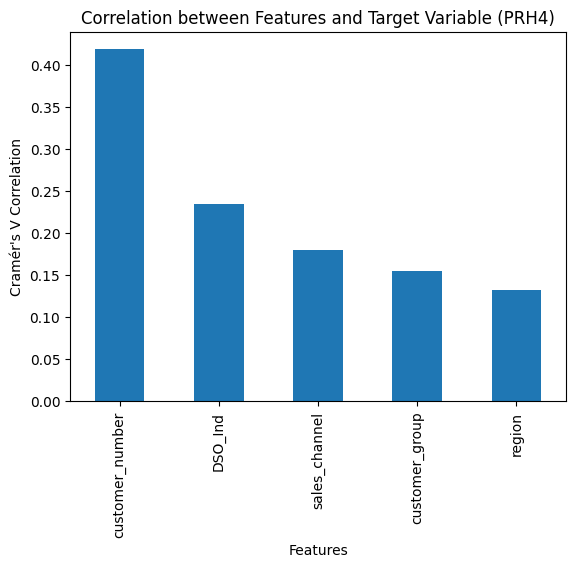

In [151]:
# Load your DataFrame
df = final_cleaned_df


# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate Cramér's V for each feature with the target variable
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate correlation for each feature
correlations = {}
for i, feature in enumerate(feature_columns):
    confusion_matrix = pd.crosstab(X[feature], y)
    correlations[feature] = cramers_v(confusion_matrix.values)

# Display the correlations
correlations_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Cramér\'s V Correlation'])
print(correlations_df)

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations_df.sort_values(by='Cramér\'s V Correlation', ascending=False).plot(kind='bar', legend=False)
plt.title('Correlation between Features and Target Variable (PRH4)')
plt.xlabel('Features')
plt.ylabel('Cramér\'s V Correlation')
plt.show()

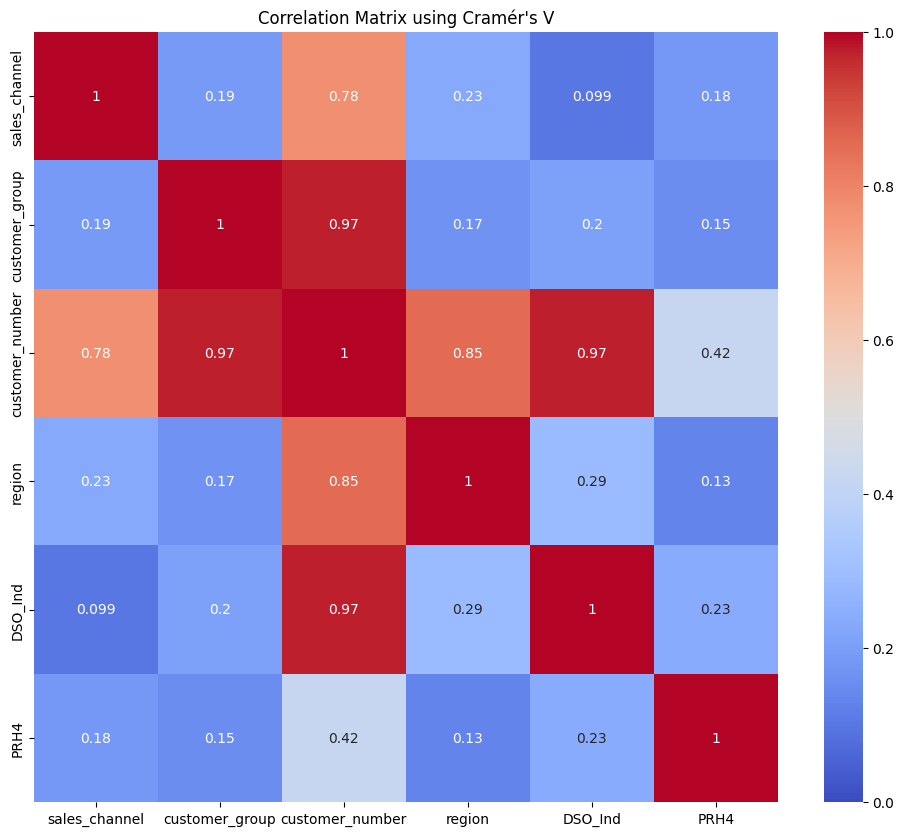

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import scipy.stats as ss

# Load your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Include the target column in the features for correlation calculation
all_columns = feature_columns + [target_column]

# Separate the features and the target variable
X = df[all_columns]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), all_columns)
    ],
    remainder='passthrough'
)
X_encoded = column_transformer.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df[target_column])

# Calculate Cramér's V for each feature with the target variable
def cramers_v(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate the correlation matrix using Cramér's V
correlation_matrix = np.zeros((len(all_columns), len(all_columns)))
for i, feature_i in enumerate(all_columns):
    for j, feature_j in enumerate(all_columns):
        if i == j:
            correlation_matrix[i, j] = 1
        else:
            confusion_matrix = pd.crosstab(X[feature_i], X[feature_j])
            correlation_matrix[i, j] = cramers_v(confusion_matrix.values)

# Convert the correlation matrix to a DataFrame for better visualization
correlation_df = pd.DataFrame(correlation_matrix, index=all_columns, columns=all_columns)

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', vmin=0, vmax=1)
plt.title('Correlation Matrix using Cramér\'s V')
plt.show()


In [143]:
# Load your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Ensure that the labels parameter in the classification report matches the unique labels in the test set
    labels = sorted(list(set(y_test)))
    target_names = label_encoder.inverse_transform(labels)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred, labels=labels, target_names=target_names)
    
    # Display the evaluation metrics
    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Precision: {precision}')
    print(f'{model_name} Recall: {recall}')
    print(f'{model_name} F1 Score: {f1}')
    print(f'{model_name} Classification Report:')
    print(report)
    print('\n')
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)  # You can change the kernel as needed

# Evaluate models and collect results
results = []
results.append(evaluate_model(rf_model, "Random Forest"))
results.append(evaluate_model(xgb_model, "XGBoost"))
results.append(evaluate_model(svm_model, "SVM"))

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

Random Forest Accuracy: 0.5551344807621453
Random Forest Precision: 0.5376323191062479
Random Forest Recall: 0.5551344807621453
Random Forest F1 Score: 0.5363148218462832
Random Forest Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         1
             Abutments, Edentulous       0.39      0.24      0.30       447
                    Abutments, SRA       0.35      0.16      0.22       882
                Abutments, Ti Base       0.60      0.41      0.49       401
  Abutments, single tooth + bridge       0.47      0.30      0.36       240
        Allogenic Bone Substitutes       0.49      0.36      0.42       293
      Allogenic Soft Tissue Grafts       0.33      0.08      0.12        13
               BL Healing Surgical       0.39      0.31      0.34      1882
     BLAT Ti Implants, hydrophilic       0.56      0.82      0.67      1851
        BLAT Ti Implants, stand

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

XGBoost Accuracy: 0.48292015369229957
XGBoost Precision: 0.4719278995267456
XGBoost Recall: 0.48292015369229957
XGBoost F1 Score: 0.43473347322050104
XGBoost Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         1
             Abutments, Edentulous       0.41      0.06      0.11       447
                    Abutments, SRA       0.42      0.06      0.11       882
                Abutments, Ti Base       0.71      0.29      0.41       401
  Abutments, single tooth + bridge       0.44      0.03      0.06       240
        Allogenic Bone Substitutes       0.39      0.08      0.14       293
      Allogenic Soft Tissue Grafts       0.50      0.15      0.24        13
               BL Healing Surgical       0.36      0.22      0.27      1882
     BLAT Ti Implants, hydrophilic       0.46      0.72      0.56      1851
        BLAT Ti Implants, standard       0.51      0.67   

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

In [157]:

# Load your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(best_params)

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)

# Ensure that the labels parameter in the classification report matches the unique labels in the test set
labels = sorted(list(set(y_test)))
target_names = label_encoder.inverse_transform(labels)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, labels=labels, target_names=target_names)

# Display the evaluation metrics
print(f'Random Forest - Best Model Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:')
print(report)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth

/Users/sachin/myenv_1/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 3.6min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 3.8min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 8.0min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 8.0min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 8.4min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 5.6min
[CV] END bootstrap=True, max_dep

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning:


648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
251 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/Users

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Random Forest - Best Model Evaluation Metrics:
Accuracy: 0.555450286857203
Precision: 0.5361264117036882
Recall: 0.555450286857203
F1 Score: 0.5354286746843069
Classification Report:
                                    precision    recall  f1-score   support

           Abutments, Customizable       0.00      0.00      0.00         1
             Abutments, Edentulous       0.40      0.23      0.29       447
                    Abutments, SRA       0.34      0.16      0.22       882
                Abutments, Ti Base       0.61      0.43      0.50       401
  Abutments, single tooth + bridge       0.48      0.28      0.35       240
        Allogenic Bone Substitutes       0.49      0.34      0.40       293
      Allogenic Soft Tissue Grafts       0.00      0.00      0.00        13
               BL Healing Surgical  

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter

In [158]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd

# Load your DataFrame
df = final_cleaned_df

# Define the feature columns and the target column
feature_columns = ['sales_channel', 'customer_group', 'customer_number', 'region', 'DSO_Ind']
target_column = 'PRH4'

# Separate the features and the target variable
X = df[feature_columns]
y = df[target_column]

# One-hot encode the categorical variables
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), feature_columns)
    ],
    remainder='passthrough'
)
X = column_transformer.fit_transform(X)

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:")
print(best_params)

# Evaluate the best model
y_pred = best_rf_model.predict(X_test)

# Ensure that the labels parameter in the classification report matches the unique labels in the test set
labels = sorted(list(set(y_test)))
target_names = label_encoder.inverse_transform(labels)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
report = classification_report(y_test, y_pred, labels=labels, target_names=target_names)

# Display the evaluation metrics
print(f'Random Forest - Best Model Evaluation Metrics:')
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Classification Report:')
print(report)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


/Users/sachin/myenv_1/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=3.



[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.7min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.8min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.9min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 7.9min
[CV] END bootstrap=True, max_depth

/Users/sachin/myenv_1/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 5.1min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time= 5.2min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.7min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time= 1.6min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=11.3min
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time= 7.7min
[CV] END bootstrap=True, max_de